[['03/28/2015', 1268], ['03/29/2015', 885], ['03/30/2015', 2629], ['03/31/2015', 2997], ['04/01/2015', 2764], ['04/02/2015', 2542], ['04/03/2015', 1796]]
[datetime.datetime(2015, 3, 28, 0, 0), datetime.datetime(2015, 3, 29, 0, 0), datetime.datetime(2015, 3, 30, 0, 0), datetime.datetime(2015, 3, 31, 0, 0), datetime.datetime(2015, 4, 1, 0, 0), datetime.datetime(2015, 4, 2, 0, 0)] [1268, 885, 2629, 2997, 2764, 2542]


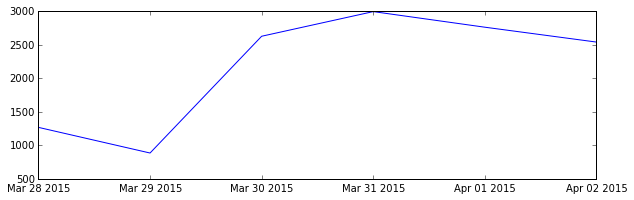

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import dateutil.parser

with open("turnstile_150404.txt", "r") as MTA_new:
    reader = csv.reader(MTA_new)
    # Skip header line
    reader.next()
    
    MTA_key1 = open("MTA_key1.txt","w")
    writer = csv.writer(MTA_key1)
    mta_list={}

    

    for index, row in enumerate(reader):
        key = tuple(row[0:4])
        value = [row[6],int(float(row[-2]))]
            
            
        if key in mta_list:
            mta_list[key].append(value)
        else:
            mta_list[key] = [value] 

#create a new dictionary
new_list = {}
for k, v in mta_list.iteritems():
    i = 0
    while i < (len(v) - 1):
        date = v[i][0]
        ini_count = v[i][1] 
        next_count = v[i][1]
        while date == v[i][0] and i< (len(v)-1):
            i += 1
            next_count = v[i][1]
        
        new_value = [date, next_count - ini_count]
        if k in new_list:
            new_list[k].append(new_value)
        else:
            new_list[k]=[new_value]
            
First_turnstile = new_list.keys()[0]
Turnstile1_data = new_list[First_turnstile]
print Turnstile1_data
dates = []
counts = []
for i in xrange(0,len(Turnstile1_data)-1):
    dates.append(dateutil.parser.parse(Turnstile1_data[i][0]))
    counts.append(Turnstile1_data[i][1])
    
print dates, counts
plt.figure(figsize=(10,3))
plt.plot(dates,counts)
    
        
